# Predicting Molecular Properties

In this project, I will be predicting **the scalar_coupling_constant** between atom pairs in molecules, given the two atom types, the coupling type, and some additional features I was able to create from the molecule structure (xyz) files.**

## LIbaries to be Used

In [1]:
# Math 
from math import sqrt

# Data analysis
import pandas as pd 
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# To monitor the progress of a loop (Very big datasets)
from progressbar import ProgressBar

## Pat I: Data Setup

### Loading the Data:

In [23]:
# All data sets are stored within this file
file_path = 'C:\\Users\\MMESA\\Desktop\\MyWork\\Data\\'

In [13]:
# struct = structures
"""
I. structures.csv:
    - number of diplicated molecule names = number of atoms for that molecule. 
    
1- molecule_name: name of the molecule where the coupling constant originates.
2- atom_index: the index of the atom in the molecule.
3- atom: the type of atom  ( four types: C, H, N, O, F)
     cartesian coordinates: (X, Y and Z)
"""

file_name = 'structures.csv'
struct_df = pd.read_csv(file_path+file_name)

In [14]:
struct_df.head(2)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976


In [15]:
struct_df.tail(1)

,molecule_name,atom_index,atom,x,y,z
2358656,dsgdb9nsd_133885,15,H,1.260745,-1.246754,-1.906767


In [16]:
print('Shape:', struct_df.shape)
print ("----------------------------------")
print ( struct_df['atom'].unique() )
print ("----------------------------------")
print ( 'atom','  Count')
print (struct_df['atom'].value_counts())
print ("----------------------------------")
print (struct_df.dtypes)

Shape: (2358657, 6)
----------------------------------
['C' 'H' 'N' 'O' 'F']
----------------------------------
atom   Count
H    1208387
C     831726
O     183187
N     132361
F       2996
Name: atom, dtype: int64
----------------------------------
molecule_name     object
atom_index         int64
atom              object
x                float64
y                float64
z                float64
dtype: object


In [17]:
struct_df.isna().sum()         # checking NaN values in the data set

molecule_name    0
atom_index       0
atom             0
x                0
y                0
z                0
dtype: int64

In [24]:
"""
II. train.csv:

1- molecule_name: the name of the molecule where the coupling constant originates
2- molecule id
3&4- atom_index_0,atom_index_1 are the atom indices of the atom-pair creating the coupling
5-   scalar_coupling_constant is the scalar coupling constant that we want to be able to predict
"""
file_name = 'train.csv'
train_df = pd.read_csv(file_path+file_name)

In [30]:
train_df.set_index('id', inplace = True)

In [31]:
train_df.head(1)

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076


In [32]:
train_df.tail(1)

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
4658146,dsgdb9nsd_133884,17,8,1JHC,117.934


In [33]:
print('Shape:', train_df.shape)
print ("----------------------------------")
print ( train_df['type'].unique() )
print ("----------------------------------")
print ( 'type','  Count')
print (train_df['type'].value_counts())
print ("----------------------------------")
print (train_df.dtypes)

Shape: (4658147, 5)
----------------------------------
['1JHC' '2JHH' '1JHN' '2JHN' '2JHC' '3JHH' '3JHC' '3JHN']
----------------------------------
type   Count
3JHC    1510379
2JHC    1140674
1JHC     709416
3JHH     590611
2JHH     378036
3JHN     166415
2JHN     119253
1JHN      43363
Name: type, dtype: int64
----------------------------------
molecule_name                object
atom_index_0                  int64
atom_index_1                  int64
type                         object
scalar_coupling_constant    float64
dtype: object


In [34]:
"""
III. test.csv:

1- molecule_name: the name of the molecule where the coupling constant originates
2- molecule id
3&4- atom_index_0,atom_index_1 are the atom indices of the atom-pair creating the coupling
5-   scalar_coupling_constant is the scalar coupling constant that we want to be able to predict
"""
file_name = 'test.csv'
test_df = pd.read_csv(file_path+file_name)

In [37]:
test_df.set_index('id', inplace = True)

In [38]:
test_df.head(1)

,molecule_name,atom_index_0,atom_index_1,type
id,,,,
4658147,dsgdb9nsd_000004,2,0,2JHC


In [39]:
test_df.tail(1)

,molecule_name,atom_index_0,atom_index_1,type
id,,,,
7163688,dsgdb9nsd_133885,15,8,1JHC


In [44]:
print('Shape:', test_df.shape)
print ("----------------------------------")
print ( test_df['type'].unique() )
print ("----------------------------------")
print ( 'type','  Count')
print (test_df['type'].value_counts())
print ("----------------------------------")
print (test_df.dtypes)

Shape: (2505542, 4)
----------------------------------
['2JHC' '1JHC' '3JHH' '3JHC' '2JHH' '1JHN' '3JHN' '2JHN']
----------------------------------
type   Count
3JHC    811999
2JHC    613138
1JHC    380609
3JHH    317435
2JHH    203126
3JHN     90616
2JHN     64424
1JHN     24195
Name: type, dtype: int64
----------------------------------
molecule_name    object
atom_index_0      int64
atom_index_1      int64
type             object
dtype: object


### Thoughts:

In [45]:
struct_df.head(1)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001


In [46]:
struct_df.tail(1)

,molecule_name,atom_index,atom,x,y,z
2358656,dsgdb9nsd_133885,15,H,1.260745,-1.246754,-1.906767


In [53]:
train_df.head(1)

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076


In [41]:
train_df.tail(1)

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
4658146,dsgdb9nsd_133884,17,8,1JHC,117.934


In [47]:
test_df.head(1)

,molecule_name,atom_index_0,atom_index_1,type
id,,,,
4658147,dsgdb9nsd_000004,2,0,2JHC


In [48]:
test_df.tail(1)

,molecule_name,atom_index_0,atom_index_1,type
id,,,,
7163688,dsgdb9nsd_133885,15,8,1JHC


1. struct_df dataset contains all the molecule structures
2. SCC (scale coupling_constant) is given for just the train_df data set, and therefore, we can combine both data sets without the scc column to perform all the required mathematical calculations.

## Part II: Features

The problem allow us to only create features out of the XYZ coordinates, and given atom pairs. The following are the features to be created: <br>
1. The distance between two points in 3D space
2. The distance between two points on the XY plane
3. The distance between two points on the YZ plane 
4. The distance between two points on the XZ plane
5. Atom pairs where 0 will mean both atom pairs are of the same type (ex: C & C), otherwise 1
6. Number of coupling interactions within a given molecule
7. Number of atoms within a given molecule

In [60]:
df = pd.merge(train_df.drop(['scalar_coupling_constant'], axis=1), test_df, how='outer')

In [68]:
print (len(df)) #very big

7163689


In [61]:
df.head(1)

,molecule_name,atom_index_0,atom_index_1,type
0,dsgdb9nsd_000001,1,0,1JHC


In [62]:
df.tail(1)

,molecule_name,atom_index_0,atom_index_1,type
7163688,dsgdb9nsd_133885,15,8,1JHC


In [67]:
# first i will creat arrays of the coordinates (XYZ, XY, YZ, & XZ)

XYZ_list = []
XY_list = []
YZ_list = []
XZ_list = []

pbar = ProgressBar(maxval=len(struct_df))
pbar.start()

for index,row in struct_df.iterrows():
    
    XYZ = np.array([struct_df.iloc[index]['x'],struct_df.iloc[index]['y'],struct_df.iloc[index]['z']])
    XYZ_list.append(XYZ)
    
    XY = np.array([struct_df.iloc[index]['x'],struct_df.iloc[index]['y']])
    XY_list.append(XY)
    
    YZ = np.array([struct_df.iloc[index]['y'],struct_df.iloc[index]['z']])
    YZ_list.append(YZ)
    
    XZ = np.array([struct_df.iloc[index]['x'],struct_df.iloc[index]['z']])
    XZ_list.append(XZ)
    
    pbar.update(index+1)
pbar.finish()

100% |########################################################################|


In [70]:
struct_df['XYZ']= XYZ_list
struct_df['XY']= XY_list
struct_df['YZ']= YZ_list
struct_df['XZ']= XZ_list

In [72]:
struct_df.drop(['x','y','z'],axis = 1, inplace = True)
struct_df.head(1)

,molecule_name,atom_index,atom,XYZ,XY,YZ,XZ
0,dsgdb9nsd_000001,0,C,"[-0.012698135900000001, 1.085804158, 0.0080009...","[-0.012698135900000001, 1.085804158]","[1.085804158, 0.008000995799999999]","[-0.012698135900000001, 0.008000995799999999]"


In [196]:
# The distance between two points formula

def distance_calculator(a,b,col):
    
    return sqrt(((df0.iloc[b][col]-df0.iloc[a][col])**2).sum())

In [203]:
# This loop will calculate the distance between two points using XYZ, XU, YZ, or XZ coordinates

XYZdistance_list = []
XYdistance_list = []
YZdistance_list = []
XZdistance_list = []

struct_dfg = struct_df.groupby('molecule_name')       # consider changing it

pbar = ProgressBar(maxval=len(df))
pbar.start()

for index,row in df.iterrows():
    
    df0 = struct_dfg.get_group(row.molecule_name)
    a,b = row['atom_index_0'],row['atom_index_1']
    
    XYZdistance_list.append(distance_calculator(a,b,'XYZ'))
    XYdistance_list.append(distance_calculator(a,b,'XY'))
    YZdistance_list.append(distance_calculator(a,b,'YZ'))
    XZdistance_list.append(distance_calculator(a,b,'XZ'))
    
    pbar.update(index+1)
pbar.finish()

100% |########################################################################|


In [208]:
df['XYZ_distance']= XYZdistance_list
df['XY_distance']=  XYdistance_list
df['YZ_distance']=  YZdistance_list
df['XZ_distance']=  XZdistance_list

In [209]:
df.head(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance
0,dsgdb9nsd_000001,1,0,1JHC,1.091953,1.091936,1.091852,0.016024


In [78]:
struct_grouped = struct.groupby('molecule_name')
df_grouped = df.groupby('molecule_name')

In [79]:
# This loops will check wthear the two atoms are of the same type or not. (reminder: 0 = both are the same, 1 = otherwise)

atoms_pairslist = []

pbar = ProgressBar(maxval=len(df))
pbar.start()

for index,row in df.iterrows(): 
    
    df0 = struct_grouped.get_group(row.molecule_name)
    a,b = row['atom_index_0'],row['atom_index_1']
    if (df0.iloc[a]['atom']==df0.iloc[b]['atom']):
        atoms_pairslist.append(0)
    else:
        atoms_pairslist.append(1)
        
    pbar.update(index+1)
pbar.finish()

100% |########################################################################|


In [210]:
df['atom_pairs']= atoms_pairslist
#df['atom_pairs'] = df['atom_pairs'].astype('category')  maybe ?

In [81]:
# This loop will count the number of atoms and interactions within a given molecule

atoms_numberlist = []
interactionslist = []

pbar = ProgressBar(maxval=len(df))
pbar.start()

for index,row in df.iterrows():
    
    atoms_numberlist.append(len(struct_grouped.get_group(row.molecule_name)))
    interactionslist.append(len(df_grouped.get_group(row.molecule_name))) 
    
    pbar.update(index+1)
pbar.finish()

100% |########################################################################|


In [211]:
df['atoms_number']= atoms_numberlist
df['interactions_number']=  interactionslist

In [212]:
df.head(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number
0,dsgdb9nsd_000001,1,0,1JHC,1.091953,1.091936,1.091852,0.016024,1,5,10


In [213]:
df.tail(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number
7163688,dsgdb9nsd_133885,15,8,1JHC,1.080482,0.620698,0.985018,0.989625,1,16,52


In [214]:
# we know the last value of the orginal train_df table is 4658146 

df11 = df[0:4658147]    # the new train_df table with features
df22 = df[4658147:]     # the new test _df with features

In [220]:
df11.head(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,1JHC,1.091953,1.091936,1.091852,0.016024,1,5,10,84.8076


In [221]:
df11.tail(1) 

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number,scalar_coupling_constant
4658146,dsgdb9nsd_133884,17,8,1JHC,1.080997,0.611106,1.026535,0.95388,1,18,78,117.934


In [217]:
df22.head(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number
4658147,dsgdb9nsd_000004,2,0,2JHC,2.261178,2.261178,0.0,2.261178,1,4,5


In [218]:
df22.tail(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number
7163688,dsgdb9nsd_133885,15,8,1JHC,1.080482,0.620698,0.985018,0.989625,1,16,52


In [219]:
df11['scalar_coupling_constant']=train_df['scalar_coupling_constant']

C:\Users\MMESA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [222]:
# Saving it into a new csv file 
df11.to_csv('train_df1.csv', index=False)     #JUST in case, so i don't have to redo all the long calculations.
df22.to_csv('test_df1.csv', index=False)     #JUST in case, so i don't have to redo all the long calculations.

## Part III: Data Exploration & Visualization

In [223]:
file_path = 'C:\\Users\\MMESA\\Desktop\\MyWork\\'

file_name = 'train_df1.csv'
df1 = pd.read_csv(file_path+file_name)

file_name = 'test_df1.csv'
df2 = pd.read_csv(file_path+file_name)

In [224]:
df1.head(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,1JHC,1.091953,1.091936,1.091852,0.016024,1,5,10,84.8076


In [225]:
df2.head(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number
0,dsgdb9nsd_000004,2,0,2JHC,2.261178,2.261178,0.0,2.261178,1,4,5


In [226]:
print('Shape:', df1.shape)
print ("----------------------------------")
print ( df1['type'].unique() )
print ("----------------------------------")
print ( 'type','  Count')
print (df1['type'].value_counts())
print ("----------------------------------")
print (df1.dtypes)

Shape: (4658147, 12)
----------------------------------
['1JHC' '2JHH' '1JHN' '2JHN' '2JHC' '3JHH' '3JHC' '3JHN']
----------------------------------
type   Count
3JHC    1510379
2JHC    1140674
1JHC     709416
3JHH     590611
2JHH     378036
3JHN     166415
2JHN     119253
1JHN      43363
Name: type, dtype: int64
----------------------------------
molecule_name                object
atom_index_0                  int64
atom_index_1                  int64
type                         object
XYZ_distance                float64
XY_distance                 float64
YZ_distance                 float64
XZ_distance                 float64
atom_pairs                    int64
atoms_number                  int64
interactions_number           int64
scalar_coupling_constant    float64
dtype: object


In [227]:
print('Shape:', df2.shape)
print ("----------------------------------")
print ( df2['type'].unique() )
print ("----------------------------------")
print ( 'type','  Count')
print (df2['type'].value_counts())
print ("----------------------------------")
print (df2.dtypes)

Shape: (2505542, 11)
----------------------------------
['2JHC' '1JHC' '3JHH' '3JHC' '2JHH' '1JHN' '3JHN' '2JHN']
----------------------------------
type   Count
3JHC    811999
2JHC    613138
1JHC    380609
3JHH    317435
2JHH    203126
3JHN     90616
2JHN     64424
1JHN     24195
Name: type, dtype: int64
----------------------------------
molecule_name           object
atom_index_0             int64
atom_index_1             int64
type                    object
XYZ_distance           float64
XY_distance            float64
YZ_distance            float64
XZ_distance            float64
atom_pairs               int64
atoms_number             int64
interactions_number      int64
dtype: object


In [228]:
df1_grouped = df1.groupby('type')

In [238]:
df.head(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number
0,dsgdb9nsd_000001,1,0,1JHC,1.091953,1.091936,1.091852,0.016024,1,5,10


In [229]:
df_2JHC = df1_grouped.get_group('2JHC')
df_1JHC = df1_grouped.get_group('1JHC')

df_3JHN = df1_grouped.get_group('3JHN')
df_3JHC = df1_grouped.get_group('3JHC')

df_2JHH = df1_grouped.get_group('2JHH')
df_1JHN = df1_grouped.get_group('1JHN')

df_2JHH = df1_grouped.get_group('3JHN')
df_2JHN = df1_grouped.get_group('2JHN')

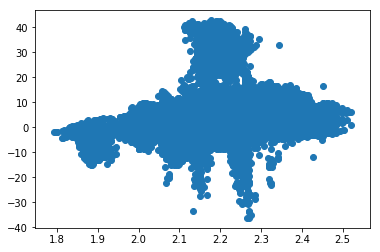

In [247]:
x = df_2JHC['XYZ_distance']
y = df_2JHC['scalar_coupling_constant']
plt.scatter(x,y)

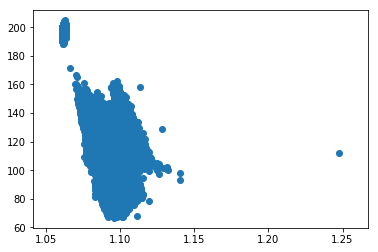

In [248]:
x = df_1JHC['XYZ_distance']
y = df_1JHC['scalar_coupling_constant']
plt.scatter(x,y)                    

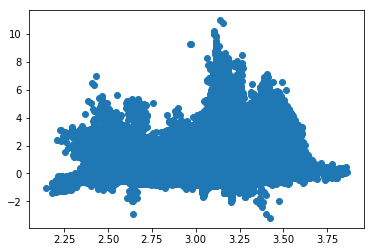

In [249]:
x = df_3JHN['XYZ_distance']
y = df_3JHN['scalar_coupling_constant']
plt.scatter(x,y) 

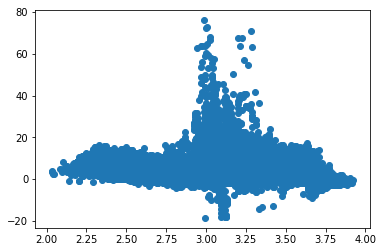

In [250]:
x = df_3JHC['XYZ_distance']
y = df_3JHC['scalar_coupling_constant']
plt.scatter(x,y) 

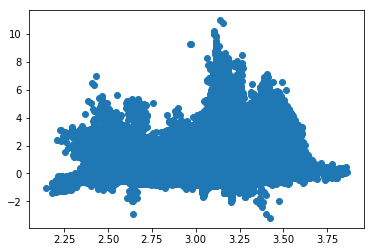

In [251]:
x = df_2JHH['XYZ_distance']
y = df_2JHH['scalar_coupling_constant']
plt.scatter(x,y)

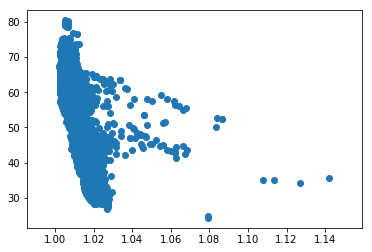

In [252]:
x = df_1JHN['XYZ_distance']
y = df_1JHN['scalar_coupling_constant']
plt.scatter(x,y)

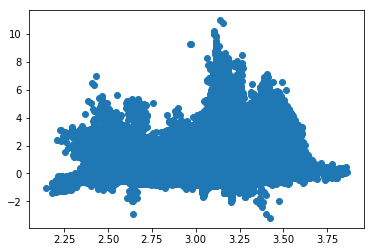

In [253]:
x = df_2JHH['XYZ_distance']
y = df_2JHH['scalar_coupling_constant']
plt.scatter(x,y)

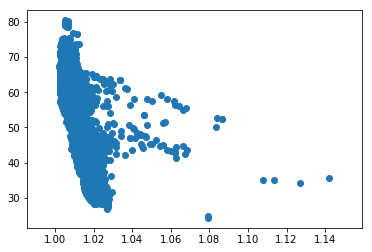

In [254]:
x = df_1JHN['XYZ_distance']
y = df_1JHN['scalar_coupling_constant']
plt.scatter(x,y)

1. Some of the graphs seems to have a linear relationship between distance in 3d space and SCC
2. It is obvious that SCC is not the only variable affecting the SCC

## Part IV: Machine Learning

Since we are predicting a quanity, linear regression is going to be our best option to start with. 

In [284]:
# Machine Learning Libaries
import sklearn

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [260]:
df.head(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number
0,dsgdb9nsd_000001,1,0,1JHC,1.091953,1.091936,1.091852,0.016024,1,5,10


In [258]:
print (df1.dtypes)

molecule_name                object
atom_index_0                  int64
atom_index_1                  int64
type                         object
XYZ_distance                float64
XY_distance                 float64
YZ_distance                 float64
XZ_distance                 float64
atom_pairs                    int64
atoms_number                  int64
interactions_number           int64
scalar_coupling_constant    float64
dtype: object


In [259]:
df2.dtypes

molecule_name           object
atom_index_0             int64
atom_index_1             int64
type                    object
XYZ_distance           float64
XY_distance            float64
YZ_distance            float64
XZ_distance            float64
atom_pairs               int64
atoms_number             int64
interactions_number      int64
dtype: object

In [265]:
df1.head(1)

,molecule_name,atom_index_0,atom_index_1,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,1JHC,1.091953,1.091936,1.091852,0.016024,1,5,10,84.8076


In [266]:
df1 = df1[['type','XYZ_distance','XY_distance','YZ_distance','XZ_distance'
          ,'atom_pairs','atoms_number','interactions_number','scalar_coupling_constant']]
df2 = df2[['type','XYZ_distance','XY_distance','YZ_distance','XZ_distance'
          ,'atom_pairs','atoms_number','interactions_number']]

In [294]:
# type should be a cat type
X = df1.iloc[:,:-1].values
y = df1.iloc[:,8].values

In [295]:
labelencoder=LabelEncoder()

X[:,0] = labelencoder.fit_transform(X[:,0])

onehotencoder = OneHotEncoder(categorical_features=[0])
X= onehotencoder.fit_transform(X).toarray()

C:\Users\MMESA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\MMESA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [296]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [297]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [298]:
y_pred = lr.predict(X_test)
y_pred

array([ 4.97464657, -0.57462692, 47.94394016, ...,  5.1866951 ,
        4.38471794, -0.52479935])

### Evaluation

In [299]:
print (mean_absolute_error(y_test,y_pred))
print (mean_squared_error(y_test,y_pred))
print (r2_score(y_test,y_pred))

4.217799692914003
62.398672946613814
0.9490854089359707


- r2 score is close to one

### Predicting the unkown SCC values for df2:

In [303]:
X2 = df2.iloc[:,:].values

In [305]:
labelencoder=LabelEncoder()

X2[:,0] = labelencoder.fit_transform(X2[:,0])

onehotencoder = OneHotEncoder(categorical_features=[0])
X2= onehotencoder.fit_transform(X2).toarray()

C:\Users\MMESA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\MMESA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [306]:
y_pred = lr.predict(X2)

In [308]:
len(y_pred)

2505542

In [315]:
df2['scalar_coupling_constant'] = y_pred

In [316]:
df2.head()

,type,XYZ_distance,XY_distance,YZ_distance,XZ_distance,atom_pairs,atoms_number,interactions_number,scalar_coupling_constant
0,2JHC,2.261178,2.261178,0.0,2.261178,1,4,5,5.358058
1,1JHC,1.062099,1.062099,0.0,1.062099,1,4,5,100.249794
2,3JHH,3.323277,3.323277,0.0,3.323277,0,4,5,12.443716
3,1JHC,1.062099,1.062099,0.0,1.062099,1,4,5,100.249794
4,2JHC,2.261178,2.261178,0.0,2.261178,1,4,5,5.358058


### File Submission:

In [319]:
file_path = 'C:\\Users\\MMESA\\Desktop\\MyWork\\Data\\'
file_name = 'sample_submission.csv'
submission = pd.read_csv(file_path+file_name)

In [320]:
submission.head()

,id,scalar_coupling_constant
0,4658147,0
1,4658148,0
2,4658149,0
3,4658150,0
4,4658151,0


In [326]:
submission.drop(['scalar_coupling_constant'],axis=1, inplace=True)

In [327]:
submission ['scalar_coupling_constant'] = y_pred

In [328]:
submission.head()

,id,scalar_coupling_constant
0,4658147,5.358058
1,4658148,100.249794
2,4658149,12.443716
3,4658150,100.249794
4,4658151,5.358058


In [329]:
submission.to_csv('submission.csv', index=False)     #JUST in case, so i don't have to redo all the long calculations.